## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Identify the factors that could predict what the causes for the cancer death rates are

### b) Defining the Metric for Success

This project will be considered a success when:

* We are able to confidently predict the cancer death rate
* The model doesn't need to be re - assesed as the variances from the residual errors(prediction errors) are equal/homogeneous





### c) Understanding the Context 

Your client is the African Cancer Institute at Stellenbosch University aiming to:

Contribute to improving cancer prevention (both primary and secondary prevention), including screening, diagnosis and management in Africa. 
The institute is also coordinating and directive institution for research and training in the field of cancer within the University.

For the above-mentioned process, the institution has tasked me to identify factors that contribute to the death rate of cancer patients using collected dataset. 

In addition, you have also been requested to build a multiple linear regression model to predict the death rate. 


### d) Recording the Experimental Design


1. Load dataset and libraries.
2. Clean dataset.
3. Carry out data analysis.
4. Carry out data modeling.
5. Summarize findings.
6. Provide recommendations.
7. Challenge the solution.

### e) Data Relevance

The data provided is sufficient and appropriate for answering the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

In [ ]:
!pip install mplcyberpunk
  
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")
plt.plot([1, 3, 9, 5, 2, 1, 1], marker='o')
plt.plot([4, 5, 5, 7, 9, 8, 6], marker='v')
plt.plot([2, 3, 4, 3, 4, 5, 3], marker='s')
# Add glow effects-Optional
mplcyberpunk.add_glow_effects()
plt.show()

In [12]:
import matplotlib.style as style

style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
# load and preview dataset
cancer = pd.read_csv('cancer_reg.csv')
cancer.sample(3)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
1190,83.0,23,136.9,402.7,75348,23125,7.7,0.000000,"(61494.5, 125635]",38.0,38.2,37.9,"Teton County, Wyoming",47.7,7.4,25.2,NaN,26.7,17.9,37.8,76.5,2.6,77.0,67.2,46.1,14.4,5.5,93.160325,0.322711,1.900408,2.783380,50.580188,1.745232
1563,1976.0,720,160.2,447.3,65555,401515,9.5,249.056698,"(61494.5, 125635]",41.3,40.1,42.5,"Clackamas County, Oregon",54.9,11.8,33.9,NaN,9.3,23.5,21.5,59.2,8.3,75.3,NaN,51.8,28.3,13.5,89.271463,0.912854,4.087685,1.526559,54.650821,5.072390
247,312.0,136,176.7,420.8,43353,54591,14.5,36.636076,"(42724.4, 45201]",44.7,43.2,46.1,"Washington County, Virginia",53.9,11.1,34.4,NaN,8.8,32.9,14.4,53.6,6.9,67.4,49.3,41.5,37.7,17.7,96.457203,1.490166,0.555160,0.500374,52.008997,5.091597


In [4]:
# load glossary
glossary = pd.read_csv('regression_project_glossary.csv',header = None,sep=';')
glossary

,0
0,"avganncount, decimal, Mean number of reported cases of cancer diagnosed annually (a)"
1,"avgdeathsperyear, integer, Mean number of reported mortalities due to cancer (a)"
2,"target_deathrate, decimal, Dependent variable. Mean per capita (100,000) cancer mortalities (a)"
3,"incidencerate, decimal, Mean per capita (100,000) cancer diagnoses (a)"
4,"medincome, integer, Median income per county (b)"
5,"popest2015, integer, Population of county (b)"
6,"povertypercent, decimal, Percent of populace in poverty (b)"
7,"studypercap, decimal, Per capita number of cancer-related clinical trials per county (a)"
8,"binnedinc, string, Median income per capita binned by decile (b)"
9,"medianage, decimal, Median age of county residents (b)"


In [5]:
# check dataset shape
cancer.shape

(3047, 33)

In [6]:
# preview variable datatypes
cancer.dtypes

avganncount                float64
avgdeathsperyear             int64
target_deathrate           float64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                   object
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                   object
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctsomecol18_24            float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack            

In [7]:
# check for duplicates
cancer.duplicated().sum()

0

In [16]:
# check for missing values
cancer.isnull().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

There are missing values in the 'pctsomecol18_24' variable (2,285), the 'pctemployed16_over' variable (152), and the 'pctprivatecoveragealone' variable (609). We will look at their percentage when compared to the total number of records.

In [8]:
pctsomecol18_24_missing = round(cancer['pctsomecol18_24'].isna().mean() * 100, 2)
pctemployed16_over_missing = round(cancer['pctemployed16_over'].isna().mean() * 100, 2)
pctprivatecoveragealone_missing = round(cancer['pctprivatecoveragealone'].isna().mean() * 100, 2)

print("Percentage missing for 'pctsomecol18_24' variable:", pctsomecol18_24_missing)
print("Percentage missing for 'pctemployed16_over' variable:", pctemployed16_over_missing)
print("Percentage missing for 'pctprivatecoveragealone' variable:", pctprivatecoveragealone_missing)

Percentage missing for 'pctsomecol18_24' variable: 74.99
Percentage missing for 'pctemployed16_over' variable: 4.99
Percentage missing for 'pctprivatecoveragealone' variable: 19.99


A rule of thumb is to drop any variable which has more than 5-10% of its data missing. Therefore, we will drop the 'pctsomecol18_24' and 'pctprivatecoveragealone' variables, and then impute the missing 'pctemployed16_over' values with the mean of that variable.

In [9]:
# drop the variables exceeding this limit and impute the remaining ones with the median.

cancer.drop(['pctsomecol18_24', 'pctprivatecoveragealone'], axis = 1, inplace=True)

# Imputing the remaining one variable with the median value.

median_pctemployed16 = cancer['pctemployed16_over'].median()
cancer['pctemployed16_over'] = cancer['pctemployed16_over'].fillna(median_pctemployed16)

cancer.isna().sum()

avganncount               0
avgdeathsperyear          0
target_deathrate          0
incidencerate             0
medincome                 0
popest2015                0
povertypercent            0
studypercap               0
binnedinc                 0
medianage                 0
medianagemale             0
medianagefemale           0
geography                 0
percentmarried            0
pctnohs18_24              0
pcths18_24                0
pctbachdeg18_24           0
pcths25_over              0
pctbachdeg25_over         0
pctemployed16_over        0
pctunemployed16_over      0
pctprivatecoverage        0
pctempprivcoverage        0
pctpubliccoverage         0
pctpubliccoveragealone    0
pctwhite                  0
pctblack                  0
pctasian                  0
pctotherrace              0
pctmarriedhouseholds      0
birthrate                 0
dtype: int64

In [25]:
# save the data set to a clean CSV file

cancer.to_csv('cancer_clean.csv', index=False)

In [10]:
# loading the clean dataset

cancer = pd.read_csv('cancer_clean.csv')
cancer.shape

(3047, 31)

## <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 Test for Multicollinearity

Since our dataset consists of largely numerical variables, we will look at the correlations between our variables so we can look at multicollinearity.

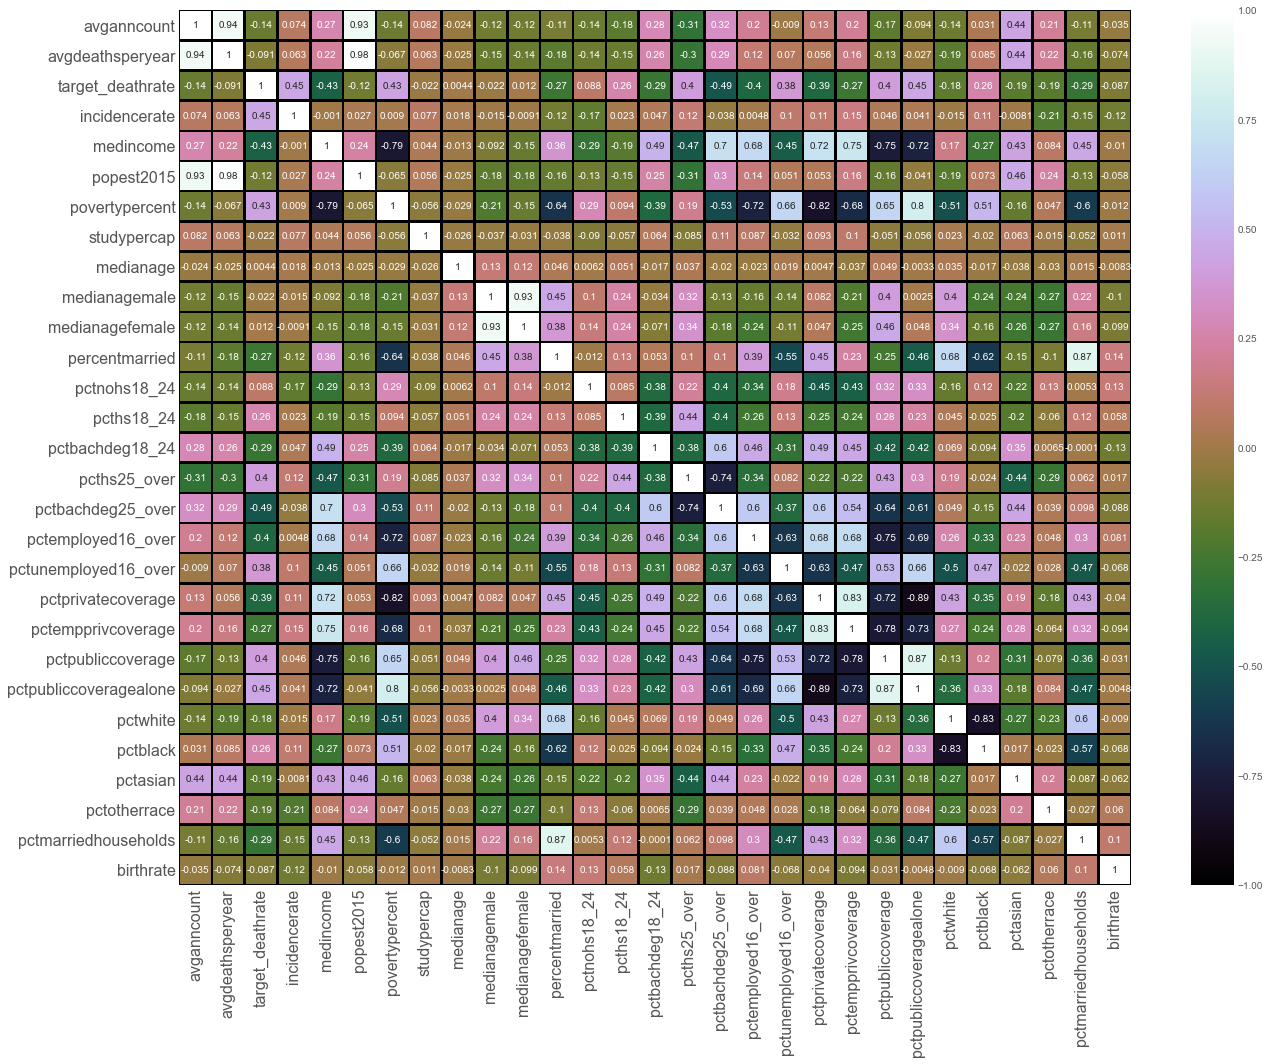

In [30]:
# checking the correlations between the numerical variables
corr = cancer.corr()

# plotting the correlations onto a heatmap
plt.style.use("ggplot")
plt.figure(figsize = (19, 15))
sns.heatmap(corr, vmin = -1 , vmax = 1 , annot = True, cmap = 'cubehelix' , linewidths = 1.5, linecolor= 'black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

We see that a lot of variables are highly correlated with one another. We will use these correlations to create Variance Inflation Factor (VIF) scores which are used to test for multicollinearity.

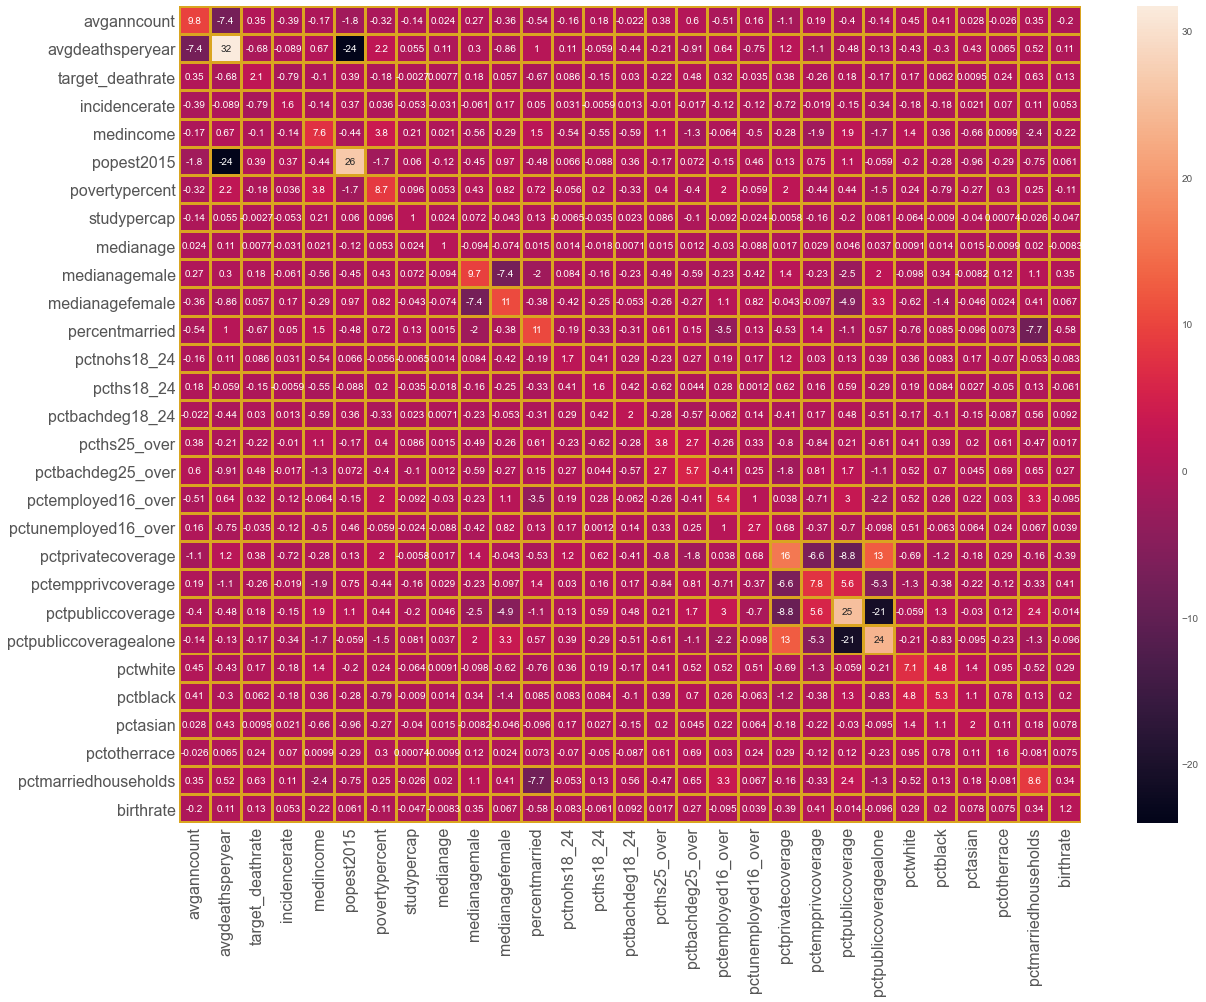

In [37]:
# create a dataframe showing the VIF scores of the above correlations
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)


# plot the heatmap

plt.style.use("ggplot")
plt.figure(figsize = (18, 14))
sns.heatmap(vif, annot = True , linewidths = 2 , linecolor = 'goldenrod')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

A VIF score of 5 and higher indicates that that particular variable has relatively high multicollinearity with one or more variables in the dataset, and that variable needs to be removed to carry out regression. Since having little or no multicollinearity is one of the assumptions of linear regression, of which we will do multiple linear regression, we should create a dataset with little to no multicollinearity.

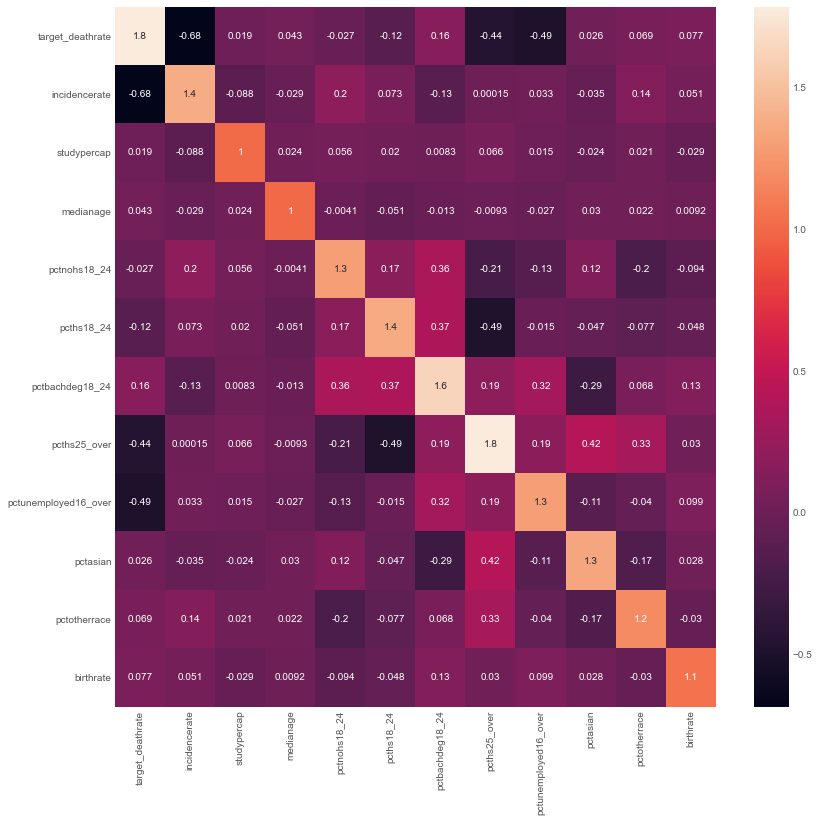

In [41]:
# drop the variables with VIF scores higher than 5
new_cancer = cancer.drop(columns = ['avganncount', 'avgdeathsperyear', 'medincome', 'popest2015',
                                    'povertypercent', 'medianagemale', 'medianagefemale', 'percentmarried',
                                   'pctbachdeg25_over', 'pctemployed16_over', 'pctprivatecoverage', 
                                    'pctempprivcoverage', 'pctpubliccoverage', 'pctpubliccoveragealone', 
                                    'pctwhite', 'pctblack', 'pctmarriedhouseholds'], axis = 1)

# # get the VIF score
new_corr = new_cancer.corr()
new_vif = pd.DataFrame(np.linalg.inv(new_corr.values), index = new_corr.index, columns = new_corr.columns)

# # plot the VIF score
plt.style.use("ggplot")
plt.figure(figsize = (12, 12))
sns.heatmap(new_vif, annot = True, linecolor = "goldenrod")
plt.show()

This dataset is much better suited for linear regression

In [42]:
# checking the data types
new_cancer.dtypes

target_deathrate        float64
incidencerate           float64
studypercap             float64
binnedinc                object
medianage               float64
geography                object
pctnohs18_24            float64
pcths18_24              float64
pctbachdeg18_24         float64
pcths25_over            float64
pctunemployed16_over    float64
pctasian                float64
pctotherrace            float64
birthrate               float64
dtype: object

In [43]:
# removing non-numerical variables
new_cancer = new_cancer.drop(columns = ['binnedinc', 'geography'])
new_cancer.shape

(3047, 12)

Our dataset is now ready for modeling.

## <font color='#2F4F4F'>4. Data Modeling</font>

In [44]:
# dividing our dataset into features (X) and target (y)
X = new_cancer.drop(['target_deathrate'], axis = 1)
y = new_cancer['target_deathrate'].values

print(X.shape)
print(y.shape)

(3047, 11)
(3047,)


In [121]:
# splitting into train and test sets 80-20
from sklearn.model_selection import train_test_split as tts

X_train , X_test , y_train , y_test = tts(X , y , test_size = .2 , random_state = 0)

In [122]:
# Training our Algorithm: Fitting our regressor / model to the dataset

# importing our Linear Regression function
from sklearn.linear_model import LinearRegression

# instantiating our regressor
linear_regressor = LinearRegression()

In [123]:
# fitting our regressor to our training data
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [124]:
# making predictions on the test set of our independent variables
linear_y_pred = linear_regressor.predict(X_test)

In [125]:
# comparing the actual output values with the predicted values
linear_compare = pd.DataFrame({
    'Actual' : y_test, 
    'Predicted' : linear_y_pred
})

# previewing 10 samples
print("Predicted .vs. Actual value samples for the Linear Regressor", "\n", linear_compare.sample(10))

Predicted .vs. Actual value samples for the Linear Regressor 
      Actual   Predicted
287   185.7  216.394161
61    182.5  173.733873
341   152.8  160.048829
164   207.1  180.365348
372   177.8  187.129198
8     197.9  203.776131
173   120.0  145.961795
544   164.6  195.060911
345   177.0  154.497889
551   173.4  167.413425


In [126]:
# evaluating model performance using Root Mean Squared Error (RMSE)
from sklearn import metrics 
print('Linear Regressor Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, linear_y_pred)))

Linear Regressor Root Mean Squared Error: 20.197078421875656


In [127]:
print("10% of target death rate mean:", new_cancer['target_deathrate'].mean() * 0.1)

10% of target death rate mean: 17.866406301279973


The RMSE score is slightly higher than 10% of the mean of our target variable, which means that our model was somewhat accurate.

In [128]:
print('R-squared:', metrics.r2_score(y_test, linear_y_pred))

R-squared: 0.48297173538330007


Our model returned a R-squared score of 0.48 meaning the regression model fit 48% of the data.

### 4.1 Residual Plots & Heteroscedasticity

In [103]:
# create residuals by substracting the test value from the predicted value for each row in our dataset
residuals = np.subtract(linear_y_pred, y_test)

# converting the residuals array into a dataframe
residuals_df = pd.DataFrame(residuals)

# previewing the summary statistics
residuals_df.describe()

,0
count,610.000000
mean,0.074800
std,20.213515
min,-75.831038
25%,-10.797118
50%,1.481363
75%,13.250153
max,69.771806


We will plot our residuals on a scatter plot. If the points in the residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a nonlinear model is more appropriate.

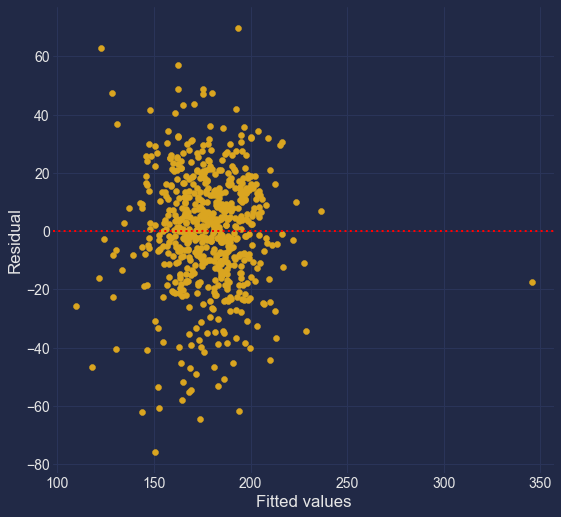

In [110]:
# plotting our residuals
plt.figure(figsize=(8,8))
plt.style.use("cyberpunk")
plt.scatter(linear_y_pred, residuals, color='goldenrod')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y = residuals.mean(), color='red', linewidth = 2, linestyle = "dotted")
plt.grid(True)
plt.show()

We see that a lot of values are scattered around the mean while a fairly large amount are spread further apart from the mean, meaning that there are no obvious patterns. We will go ahead and perform a test for heteroscedasticity to be certain. We will use Bartlett's Test to test the null hypothesis that the variances in this dataset are homogeneous (equal).

In [111]:
import scipy as sp

# # using the scipy bartlett function to get our test result and p-value
test_result, p_value = sp.stats.bartlett(linear_y_pred, residuals)

# # computing the critical value of a chi-squared distribution
degree_of_freedom = len(linear_y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# print the critical value
print("Critical value:", critical_value)

632.5679294751822
Critical value: 632.5679294751822


If the test result of our Bartlett test is greater than the critical value of the chi-squared distribution, then we will reject our null value and conclude that the variances in our dataset are not equal, i.e., they are heterogeneous. Otherwise, we will accept that this dataset's variances are homogeneous.

In [112]:
if (test_result > critical_value):
    print(" The variances are heterogeneous (unequal), and the model needs to be reassessed.")
else:
    print('The variances are homogeneous (equal).')

The variances are homogeneous (equal).


## <font color='#2F4F4F'>5. Summary of Findings</font>

From our analysis and modeling, it is clear that the modeling algorithm is not a good fit for our data.


## <font color='#2F4F4F'>6. Recommendations</font>

I would recommend the company come up with either a different research question or get a different dataset.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

While the data was correct and valid, the research question was not appropriate for it, considering it had many outliers and was hence not suitable for linear regression.